# PyXplor Tutorial

## Introduction

Welcome to the `pyxplor` package tutorial! This tutorial aims to showcase the ease and efficiency of using `pyxplor` for exploratory data analysis (EDA). 

EDA serves as the cornerstone of understanding, interpreting, and ultimately deriving meaningful insights from data. It empowers data scientists and analysts (or anyone really who is exploring data) to unveil patterns, detect anomalies, and formulate hypotheses, laying the groundwork for robust modeling and informed decision-making. Not only is EDA key in gaining a deeper comprehension of the underlying phenomena but also guides the selection of appropriate techniques for subsequent analysis and allows us to focus our efforts on the most promising avenues of inquiry,making it an crucial precursor to effective data-driven strategies. 

By the end of this guide, you'll discover how this package can significantly streamline your EDA process by providing a suite of tools and functions designed specifically for data exploration tasks. This saves time and effort, allowing you to focus on interpreting insights rather than implementing basic analysis functionalities from scratch - making it a valuable tool for data exploration.

### What to Expect

- Learn how to harness the power of `pyxplor` to simplify and expedite your EDA tasks.
- Gain insights into its essential functions that cater to various aspects of exploratory analysis.

### Benefits of Using `pyxplor`

- Simplifies complex EDA workflows.
- Enhances data visualization for better interpretation.
- Accelerates the EDA process with efficient functions.

Let's dive in by importing the key functions from the `pyxplor` package, alongside other essential packages for this tutorial.


In [1]:
import pyxplor
from pyxplor.plot_binary import plot_binary
from pyxplor.plot_categorical import plot_categorical
from pyxplor.plot_numeric import plot_numeric
from pyxplor.plot_time_series import plot_time_series

import seaborn as sns
import pandas as pd
import os
pd.options.display.max_columns = 6

In [2]:
print(pyxplor.__version__)

0.1.0


### Exploring `seaborn` `taxis` Dataset

We'll be using the `seaborn` `taxis` dataset as our example dataset. This dataset, commonly employed in data science tutorials, contains information related to taxi rides and serves as an ideal playground for our exploration with `pyxplor`. With over a million recorded taxi journeys, this dataset offers a practical playground for learners and more experienced analysts alike to delve into exploratory data analysis (EDA) with `pyxplor`. With its diverse variables and sizable sample size, the `taxis` dataset facilitates guided exercises in uncovering insights, and even detecting anomalies and formulating hypotheses should you wish to expand on the content covered in this tutorial. 

Let's take a quick peek at the first couple of rows as well as the data type of each variable to get a sense of the data structure:


In [3]:
taxi = sns.load_dataset("taxis")
taxi.head()

,pickup,dropoff,passengers,...,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,...,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,...,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,...,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,...,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,...,Yorkville West,Manhattan,Manhattan


In [4]:
print("Dataset Information:")
taxi.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2

Our `taxis` dataset is rich and diverse, featuring various data types, from numerical to datetime. Visualizing each variable individually in the `taxis` dataset might seem cumbersome, considering the mix of data types. Enter `pyxplor`—your solution to simplifying this intricate task. `pyxplor` offers a comprehensive suite of specialized plotting functions tailored to different data types. Whether you're working with numeric, categorical, binary, or time series data, `pyxplor` streamlines the visualization process. Say goodbye to the hassle of creating different visualizations for each variable—`pyxplor` has got you covered!


## Exploring Binary Features

We'll start by exploring the binary features in our dataset. In our dataset, we have two binary features, `color` and `payment`. If we want to explore and visualize the distribution of these two binary variables, we can utilize the `plot_binary` function.

In [5]:
taxi.color.value_counts()

color
yellow    5451
green      982
Name: count, dtype: int64

In [6]:
taxi.payment.value_counts()

payment
credit card    4577
cash           1812
Name: count, dtype: int64

The current dataset contains null values, so we'll have to drop them first before we apply the `plot_binary` function. This will be updated in a future version as we continue to optimize these functions.

In [7]:
taxi = taxi.dropna()

### Count Plots

Now, that we've dropped our null values, we can apply our `plot_binary` function. This function is really simple to use. All the function requires is the dataframe (where the binary variables locate), a list of the binary variables and the plot type (`count` or `pie`). Here's an example.

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: title={'center': 'color'}, xlabel='count', ylabel='color'>,
        <Axes: title={'center': 'payment'}, xlabel='count', ylabel='payment'>],
       dtype=object))

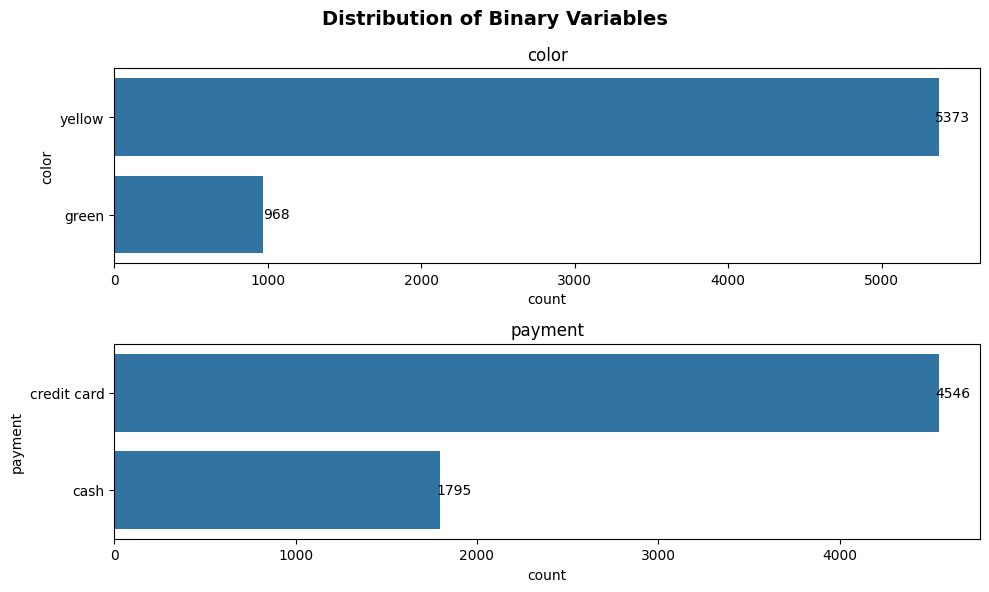

In [8]:
plot_binary(taxi, ['color', 'payment'], 'count')

Ta da! We can see that the function automatically returns the visualization of all of the binary variables specified. The function also adds the labels to the bars automatically, which is a hassle to do in `matplotlib`.

### Pie Charts

If you prefer visualizing these variables in pie charts. Just change the parameter of argument `plot_kind` from `count` to `pie`.

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: title={'center': 'Distribution of color'}>,
        <Axes: title={'center': 'Distribution of payment'}>], dtype=object))

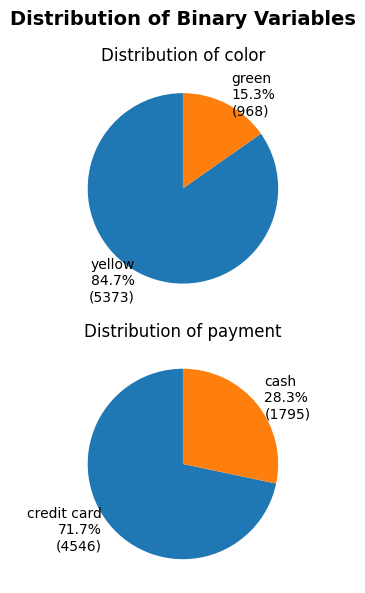

In [9]:
plot_binary(taxi, ['color', 'payment'], 'pie')

Wow! Would you look at that! Now we can even see the percentage of the distribution. Easy right! Next, we'll explore the optional arguments that will allow you to configure your visualization.

### Optional Arguments

#### `label_offset` and `label_fontsize`

The first thing you're allowed to configure is the location and the fontsize of the labels. This is so that you will be allowed to place the labels in a location that you prefer. 

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: title={'center': 'color'}, xlabel='count', ylabel='color'>,
        <Axes: title={'center': 'payment'}, xlabel='count', ylabel='payment'>],
       dtype=object))

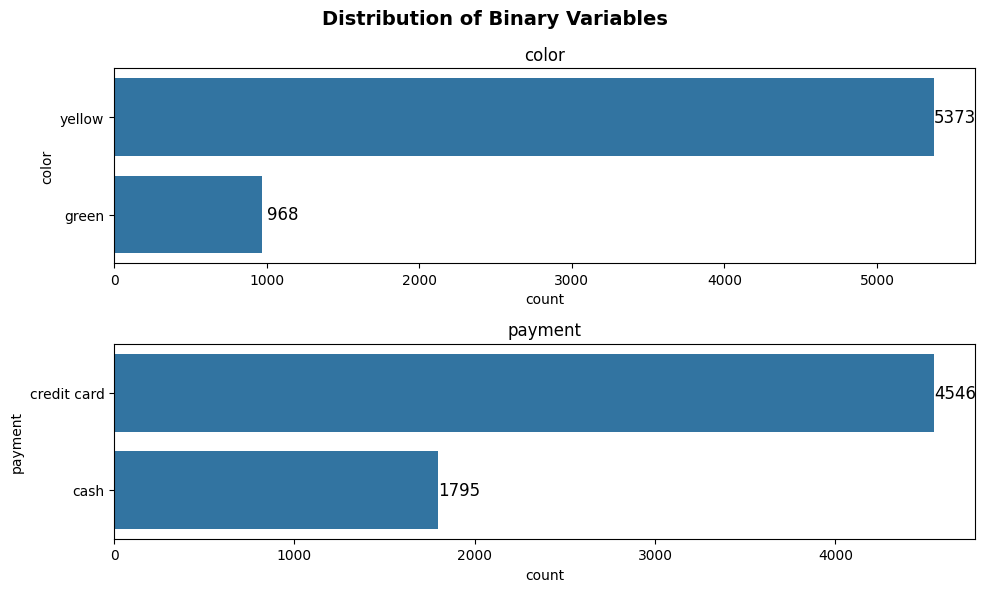

In [10]:
plot_binary(taxi, ['color', 'payment'], 'count', label_offset = 15, label_fontsize = 12)

Since the default plot orientation (can be modified through argument `plot_orientation`) is horizontal (the bars are horizontal), `label_offset` moves the label to the right if it's positive and moves the label to the left if the it's negative.

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: title={'center': 'color'}, xlabel='count', ylabel='color'>,
        <Axes: title={'center': 'payment'}, xlabel='count', ylabel='payment'>],
       dtype=object))

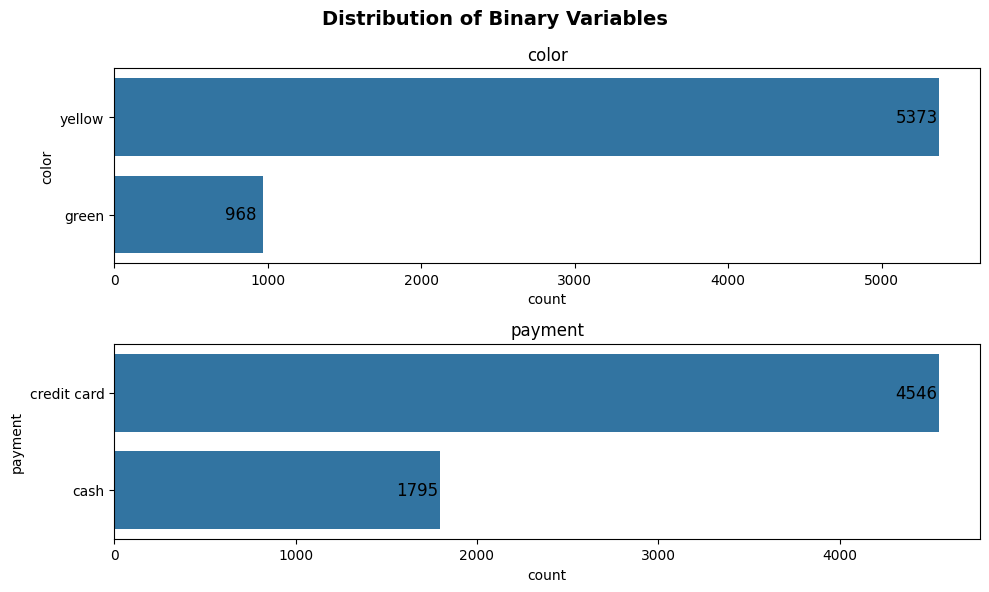

In [11]:
plot_binary(taxi, ['color', 'payment'], 'count', label_offset = -16, label_fontsize = 12)

Note that `label_offset` and `label_fontsize` will only affect the bar chart. These arguments will not affect the labels of the pie chart. This will be a function that we'll add in the future.

#### `plot_orientation`

Just now we mentioned that we can modify the `plot_orinetation` to change how the bars are oriented. `plot_orientation` takes on 2 values, `h` or `v`, which stands for horizontal-orientation and vertical-orientation, respectively. Note that this argument also only applies to the bar chart since there's only one type of orientation for pie charts. Below is an example where we switch the default orientation from `h` to `v`.

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: title={'center': 'color'}, xlabel='color', ylabel='count'>,
        <Axes: title={'center': 'payment'}, xlabel='payment', ylabel='count'>],
       dtype=object))

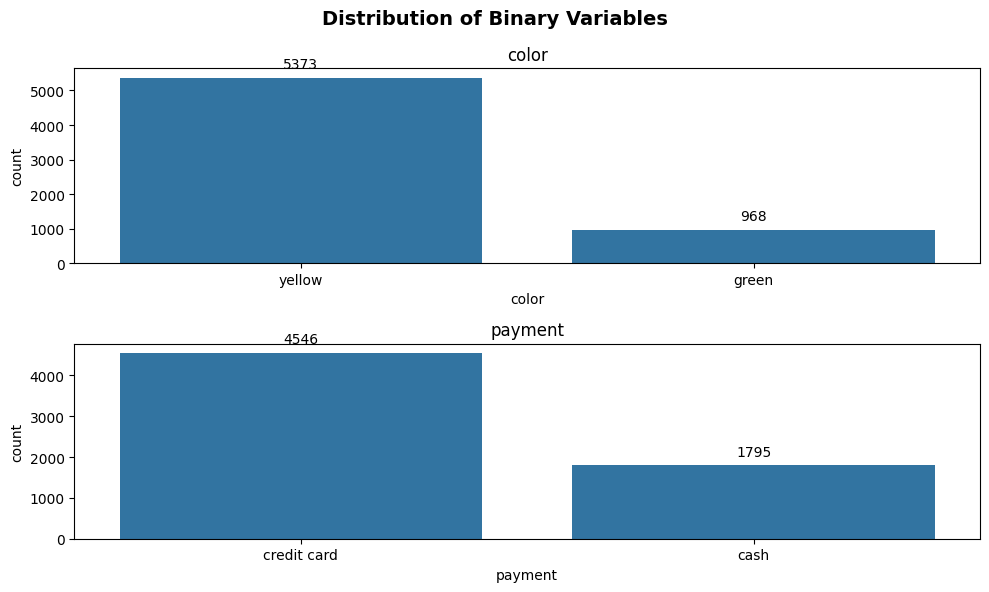

In [12]:
plot_binary(taxi, ['color', 'payment'], 'count', plot_orientation='v')

As we change the orientation from `h` to `v`, the way `label_offset` works also changes. If we set the `label_offset` as a positive value, the labels will go up, whereas if `label_offset` is a negative value, the position will go down.

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: title={'center': 'color'}, xlabel='color', ylabel='count'>,
        <Axes: title={'center': 'payment'}, xlabel='payment', ylabel='count'>],
       dtype=object))

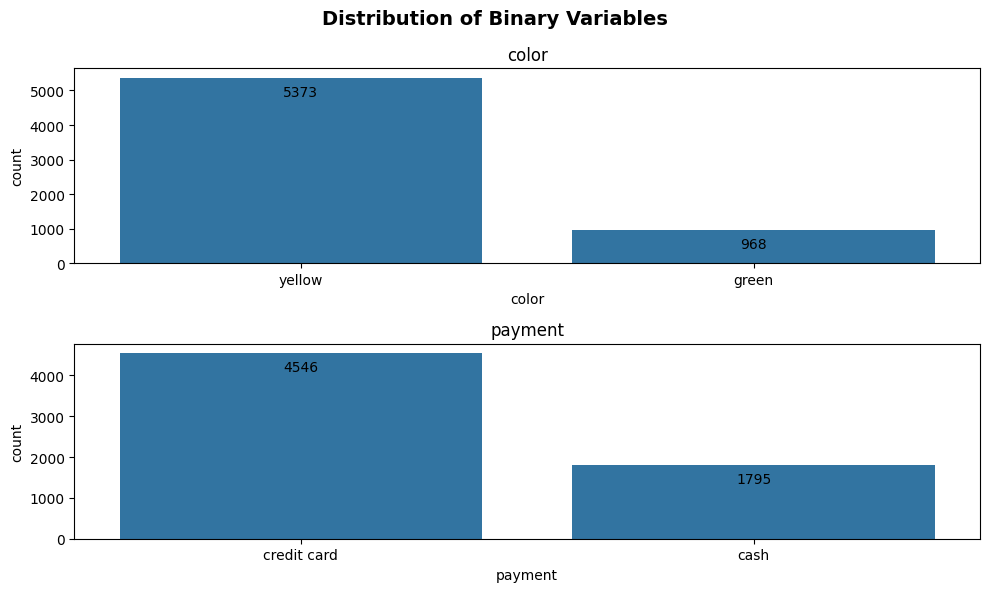

In [13]:
plot_binary(taxi, ['color', 'payment'], 'count', label_offset = -10, plot_orientation='v')

#### `figsize`

So you'll notice that the plot above looks a bit compressed because of the figure shape. Don't worry because you'll be able to modify the figure shape with the argument `figsize`. The argument `figsize` takes in a tuple with two values. The first value is the width of your figure and the second value is the height of your figure. Below is an example as we modify the `figsize` so the plot becomes easier to visualize.

(<Figure size 400x600 with 2 Axes>,
 array([<Axes: title={'center': 'color'}, xlabel='color', ylabel='count'>,
        <Axes: title={'center': 'payment'}, xlabel='payment', ylabel='count'>],
       dtype=object))

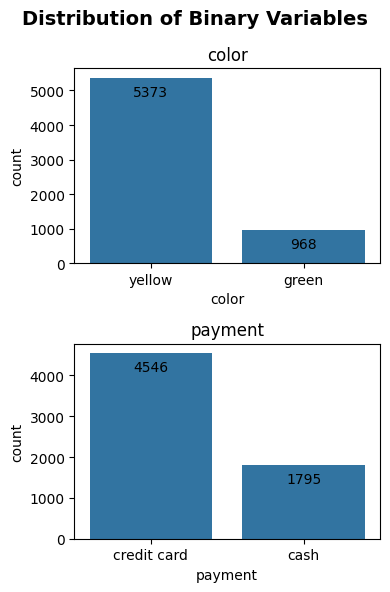

In [14]:
plot_binary(taxi, ['color', 'payment'], 'count', label_offset = -10, plot_orientation='v', figsize=(4, 6))

The plot looks much better now that it's not compressed! Hooray!

#### `output`

The next argument is `output`, where we can choose to download the figure for use. This argument takes in a boolean value. The default is `False`, which means that you do not want to download the figure. If you set it as `True`, then it will download the figure to your current path as `binary_variables.png`. 

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: title={'center': 'color'}, xlabel='count', ylabel='color'>,
        <Axes: title={'center': 'payment'}, xlabel='count', ylabel='payment'>],
       dtype=object))

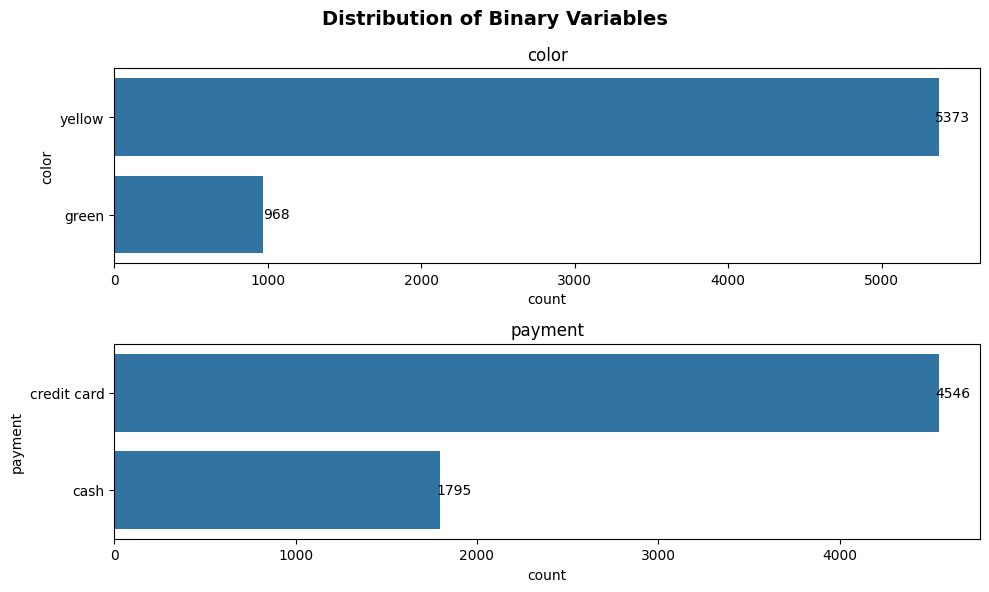

In [15]:
plot_binary(taxi, ['color', 'payment'], 'count', output=True)

If you run the code above, you should notice that the figure is downloaded to the current working directory. We'll remove the figure to clean up the process.

In [16]:
os.remove("binary_variables.png")

#### `super_title` and `super_title_font`

Finally, we can modify the super title and its fontsize. The default super title is `Distribution of Binary Variables`. If you have something that you prefer or if you want to change the fontsize of it, you're more than welcome to modify it.

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: title={'center': 'color'}, xlabel='count', ylabel='color'>,
        <Axes: title={'center': 'payment'}, xlabel='count', ylabel='payment'>],
       dtype=object))

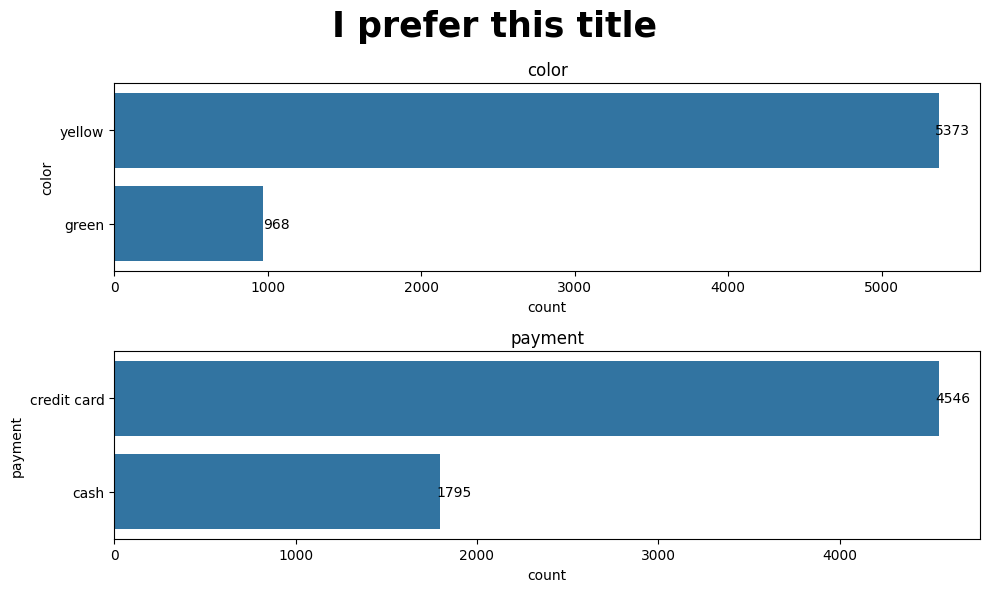

In [17]:
plot_binary(taxi, ['color', 'payment'], 'count', super_title='I prefer this title', super_title_font=25)

As we continue to work on optimizing this function, more flexibility in terms of configuring the appeareance of the plot will be added. Have fun and play around with this function!

## Exploring Categorical Features

Next, we will explore the categorical features in our dataset using our `plot_categorical` function. Like our `plot_binary` function above, this function allows us to visualize the supplied categorical features as horizontal bar plots. We will explore `plot_categorical`'s functionality further through an example using the features in our `taxi` dataset.

Looking at our `taxi` dataset, we see that `pickup_zone`, `dropoff_zone`, `pickup_borough`, `dropoff_borough` all are nominal features.

In [18]:
len(taxi.pickup_zone.unique()), len(taxi.dropoff_zone.unique())

(194, 203)

We note above that `pickup_zone` and `dropoff_zone` have 194 and 203 unique categories, respectively. 

In [19]:
len(taxi.pickup_borough.unique()), len(taxi.dropoff_borough.unique())

(4, 5)

However, `pickup_borough` and `dropoff_borough` are a higher-level of category and only have 4 and 5 unique categories, respectively.

We also note that, by nature of the number of passengers allowed in a car, `passengers` can also be considered a categorical feature. We see below that `passengers` has 7 unique values.

In [20]:
len(taxi.passengers.unique())

7

Now that we have done some preliminary exploration of our categorical features, we can apply the `plot_categorical` function. From the function definition, we note that the only required parameters are our input dataframe (that contains the categorical variables) and our list of categorical variables to be visualized. 

### Bar Plots

Let's first walk through a simple example with one categorical variable -  `passengers`.

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'passengers'}, xlabel='count'>)

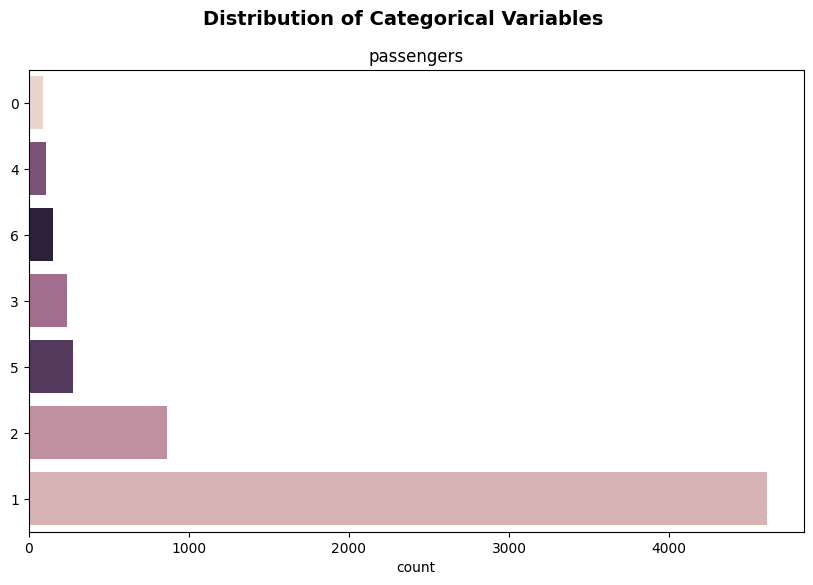

In [21]:
plot_categorical(taxi, ['passengers'])

Although this is a very simple example with a list of just one categorical feature to plot, we can observe some of the plotting behaviour that our `plot_categorical` function automates without adding any of the optional parameters. The function creates a horizontal bar plot for the supplied categorical variables ordered in descending order of count from the x-axis upwards - and distinguishes these categories by color as well.

Now that we've seen the simplest example, let's see what happens when we go to add all of the categorical features we noted above - `pickup_zone`, `dropoff_zone`, `pickup_borough`, `dropoff_borough`.

Only displaying plots for categorical variables with 20 or less unique values.
Dropping the following variables for plotting: pickup_zone, dropoff_zone


(<Figure size 1000x600 with 4 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='count'>,
        <Axes: title={'center': 'pickup_borough'}, xlabel='count'>,
        <Axes: title={'center': 'dropoff_borough'}, xlabel='count'>,
        <Axes: >], dtype=object))

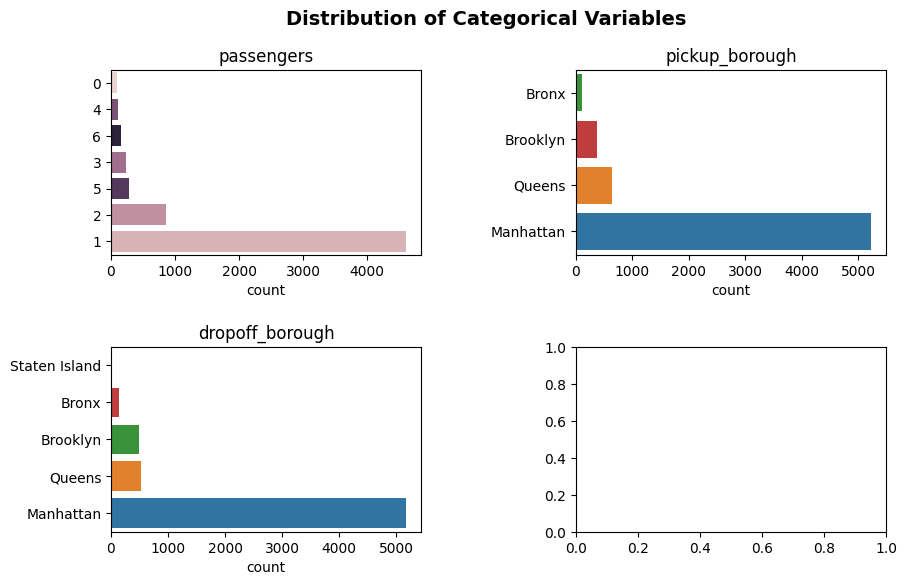

In [23]:
categorical_feats = ['passengers', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough']

plot_categorical(taxi, categorical_feats)

Interesting... you may be asking "Why did it only plot three of our categorical features? What happened to `pickup_zone` and `dropoff_zone`?". The answer is that the `plot_categorical` function only plots those categorical variables specified in the list of variables that have 20 or less unique values. As we saw above, `pickup_zone` and `dropoff_zone` have far more unique values than that - 194 and 203, repsectively. Since visualizing that many values on a bar plot would be very crammed and therefore may warrant a separate EDA of its own, `plot_categorical` drops `pickup_zone` and `dropoff_zone`, and returns the following message to indicate that it has done so:

    Only displaying plots for categorical variables with 20 or less unique values.
    Dropping the following variables for plotting: pickup_zone, dropoff_zone
    

From this slightly more complex example, we can see that `plot_categorical` helps us with preliminary EDA for categorical features. We can even use the outputs of this function and go one step further, using the messages that the function returns (like the one above) to tell us which more complex categorical variables may require a more detailed analysis.

Now that we've got the hang of the basics of `plot_categorical`, let's take a look at our optional parameters. Let's see how you can configure your visualiziation and make it your own!

### Optional Arguments

#### `yaxis_label_fontsize`

`yaxis_label_fontsize` allows us to configure the font size of the axis labels. The default font size is 10 pts - but that may be a bit small for some people. Let's try increasing this to 15 to try and make our labels more readable!

Only displaying plots for categorical variables with 20 or less unique values.
Dropping the following variables for plotting: pickup_zone, dropoff_zone


(<Figure size 1000x600 with 4 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='count'>,
        <Axes: title={'center': 'pickup_borough'}, xlabel='count'>,
        <Axes: title={'center': 'dropoff_borough'}, xlabel='count'>,
        <Axes: >], dtype=object))

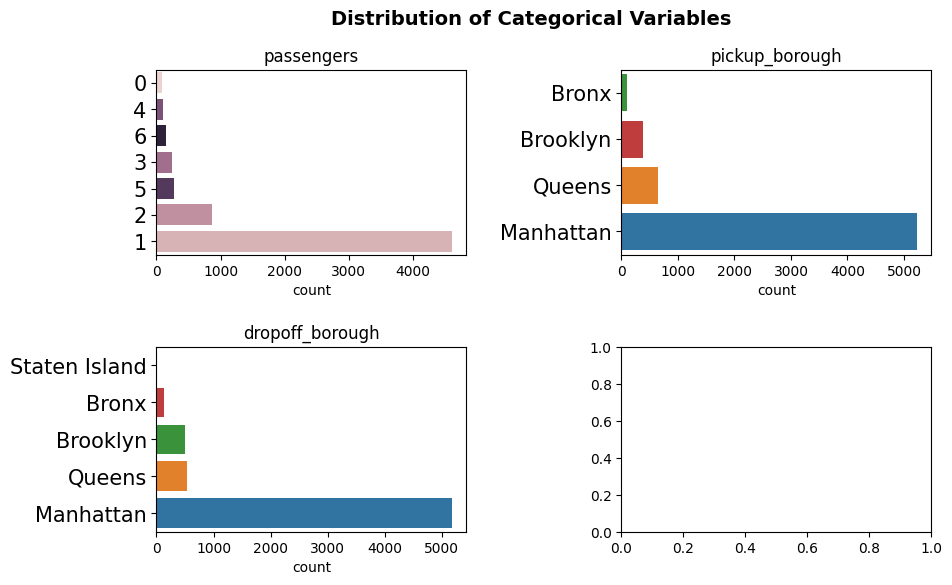

In [24]:
plot_categorical(taxi, categorical_feats, yaxis_label_fontsize=15)

Nice! Now we don't need our glasses to read the categories!

Take note also that the y-axis label font size configuration does not apply to our empty plot (which appears as we have an uneven number of sublots in our grid).

#### `padding`

 We can use the `padding` parameter to increase or decrease the space between subplots (noting that the `padding` value is expressed as a fraction of the average Axes height). The `padding` parameter is a tuple of two numerical values - where the first element represents the height padding and the second represents the width padding. 
 
 Looking at our most recent figure, we see that after increasing the fontsize of our y-axis label, we now are running into the aesthetic problem that the beginning of our y-axis labels are very close to the edge of the subplot to it's side. Let's try increasing the width spacing to 0.75 (while keeping the height spacing at the default value of 0.5) to avoid any confusion with labeling.

Only displaying plots for categorical variables with 20 or less unique values.
Dropping the following variables for plotting: pickup_zone, dropoff_zone


(<Figure size 1000x600 with 4 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='count'>,
        <Axes: title={'center': 'pickup_borough'}, xlabel='count'>,
        <Axes: title={'center': 'dropoff_borough'}, xlabel='count'>,
        <Axes: >], dtype=object))

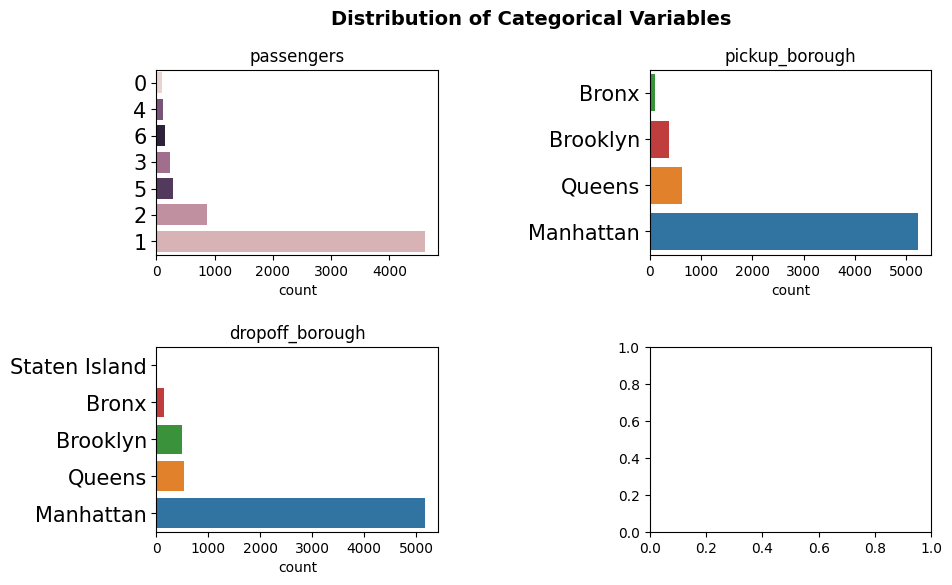

In [25]:
plot_categorical(taxi, categorical_feats, yaxis_label_fontsize=15, padding=(0.5, 0.75))

#### `figsize`

Like with `plot_binary`, we can modify the figure dimensions using the `figsize` parameter. `figsize` is a tuple of two numeric values - the width and height of the figure (with the default being a width of 10 and a height of 6). 

Let's go back to our default inputs for `yaxis_label_fontsize` and `padding`, but increasing the width to get more granular into the count scale!

Only displaying plots for categorical variables with 20 or less unique values.
Dropping the following variables for plotting: pickup_zone, dropoff_zone


(<Figure size 1500x600 with 4 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='count'>,
        <Axes: title={'center': 'pickup_borough'}, xlabel='count'>,
        <Axes: title={'center': 'dropoff_borough'}, xlabel='count'>,
        <Axes: >], dtype=object))

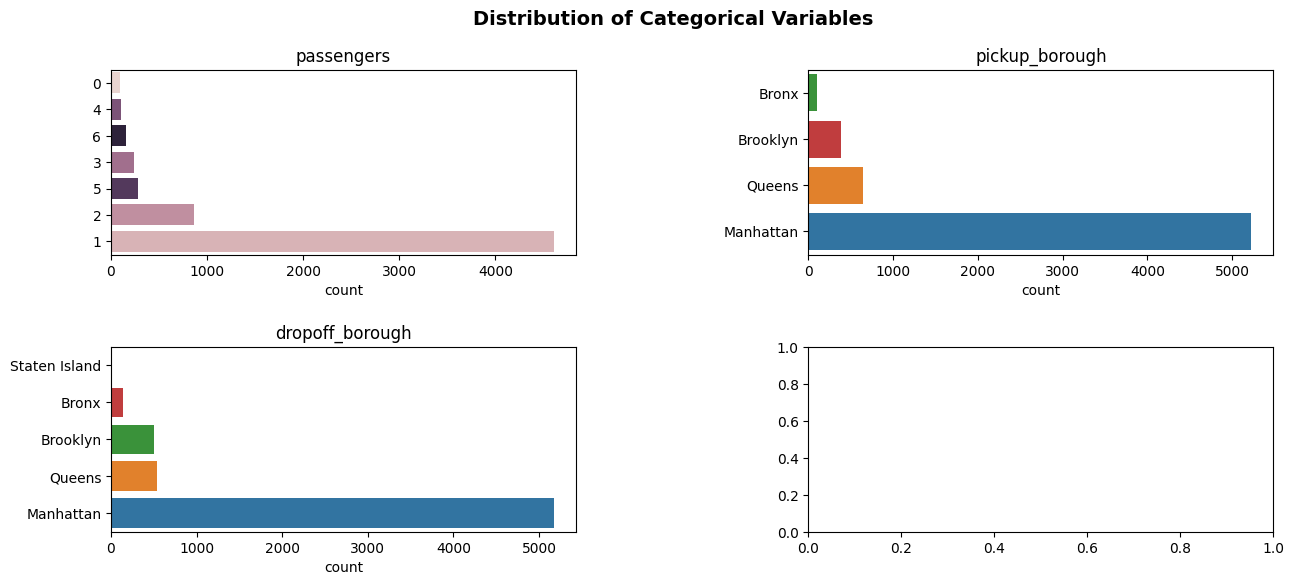

In [26]:
plot_categorical(taxi, categorical_feats, figsize=(15, 6))

Wow - I think that's our best plot yet! We see that increasing the width of our figure proportionally increases the width of our subplots.

#### `super_title` and `super_title_fontsize`

Although all of our subplots are automatically titled with the categorical feature that they correspond to, we can configure our so-called "super title". The "super title" is the overall figure title and, by default, is set to "Distribution of Categorical Variables" (through the `super_title` parameter). We can also change the font size of this super title using the `super_title_fontsize` parameter which, by default, is set to 14 pts. 

This title is accurate, but let's change it up a bit and make it bigger so that it really stands out!

Only displaying plots for categorical variables with 20 or less unique values.
Dropping the following variables for plotting: pickup_zone, dropoff_zone


(<Figure size 1500x600 with 4 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='count'>,
        <Axes: title={'center': 'pickup_borough'}, xlabel='count'>,
        <Axes: title={'center': 'dropoff_borough'}, xlabel='count'>,
        <Axes: >], dtype=object))

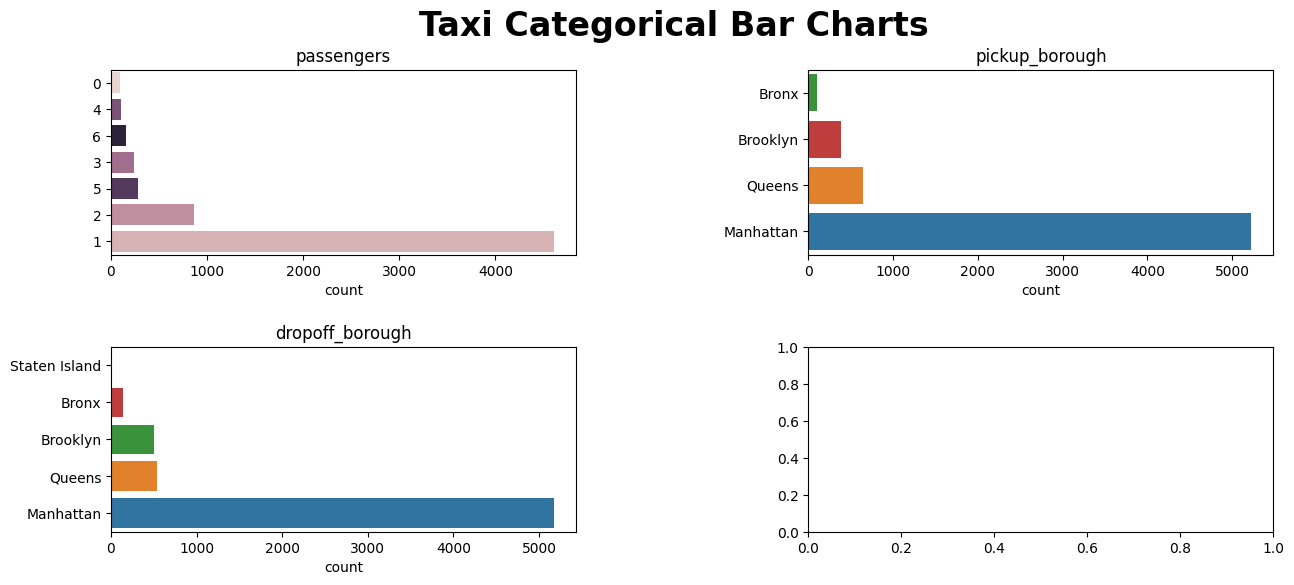

In [27]:
plot_categorical(taxi, categorical_feats, figsize=(15, 6), super_title="Taxi Categorical Bar Charts", super_title_fontsize=24)

#### `output`

Now that we are happy with the configuration of our visualization, it's tme to save our figure. As described with `plot_binary`, the `output` parameter is a boolean "flag" that indicates whether the figure is to be saved (rather than just returned as a matplotlib object). The default is `False` which indicates that the figure will not be saved. We can set this `output` parameter to be `True` to save the figure to the current working directory as `categorical_variables.png`.

Only displaying plots for categorical variables with 20 or less unique values.
Dropping the following variables for plotting: pickup_zone, dropoff_zone


(<Figure size 1500x600 with 4 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='count'>,
        <Axes: title={'center': 'pickup_borough'}, xlabel='count'>,
        <Axes: title={'center': 'dropoff_borough'}, xlabel='count'>,
        <Axes: >], dtype=object))

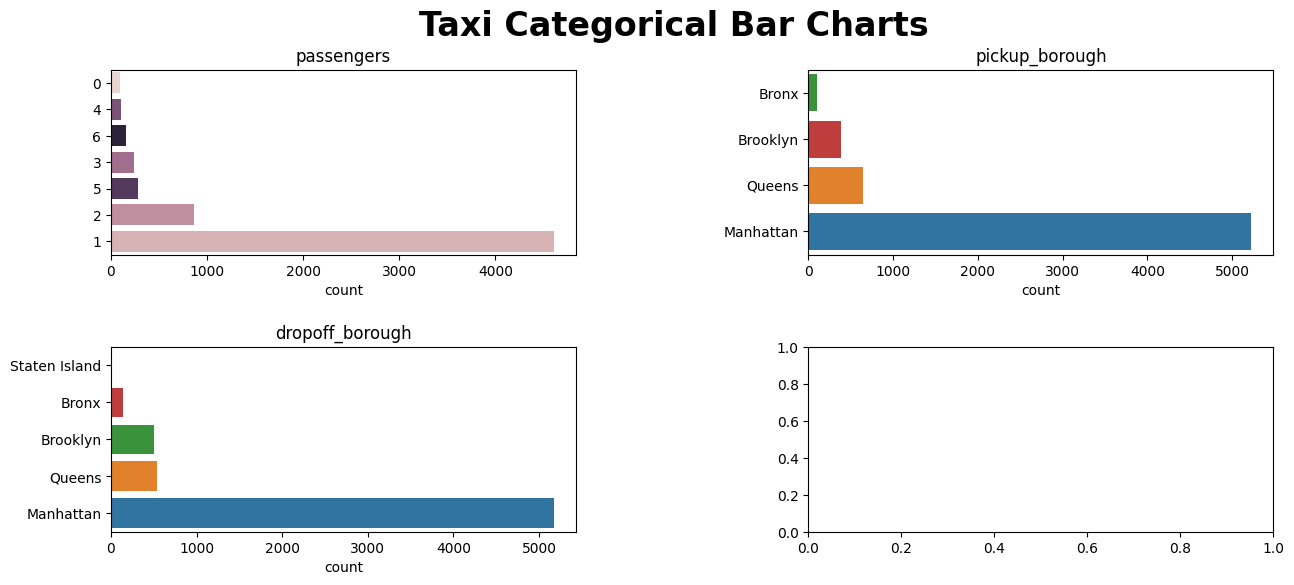

In [28]:
plot_categorical(taxi, categorical_feats, figsize=(15, 6), super_title="Taxi Categorical Bar Charts", super_title_fontsize=24, output=True)

If you run the code above, you should notice that a new `categorical_variables.png` file has been saved to your current working directory. Let's remove this figure to clean up the process.

In [29]:
os.remove("categorical_variables.png")

## Exploring Numeric Features

Now, let's dive into the exciting world of exploring numeric features in your dataset using the versatile `plot_numeric` function. This handy function empowers you to visualize your numeric variables effortlessly, providing insights at a glance.

This versatile function simplifies the exploration process, requiring just a few essential inputs to generate insightful visualizations. `plot_numeric`, like the functions described above, takes in the dataframe containing your numeric variables and the specified list of numeric variables you wish to explore. However, `plot_numeric` has another essential input - plot type - that allows the user to choose the preferred plot type: 'hist' (Histogram), 'kde' (Kernel Density Estimate), or 'hist+kde' (Combined Histogram and KDE). With these fundamental inputs, you're ready to embark on a visual journey, unraveling insights from your numeric data effortlessly!


To kick things off, let's consider a real-life example with a dataset from the taxi domain. Our dataset boasts numeric features such as `passengers`, `distance`, `fare`, `tip`, `tolls`, and `total`. We'll harness the power of `plot_numeric` to unleash the potential hidden in these numeric variables.

In [30]:
numeric_features = taxi.select_dtypes(include=['number']).columns.tolist()
numeric_features

['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']

### Histograms

If you're eager to unravel the distribution patterns of your numeric variables, the hist plot type is your go-to. Let's witness the magic:

(<Figure size 800x1000 with 6 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='passengers', ylabel='Count'>,
        <Axes: title={'center': 'distance'}, xlabel='distance', ylabel='Count'>,
        <Axes: title={'center': 'fare'}, xlabel='fare', ylabel='Count'>,
        <Axes: title={'center': 'tip'}, xlabel='tip', ylabel='Count'>,
        <Axes: title={'center': 'tolls'}, xlabel='tolls', ylabel='Count'>,
        <Axes: title={'center': 'total'}, xlabel='total', ylabel='Count'>],
       dtype=object))

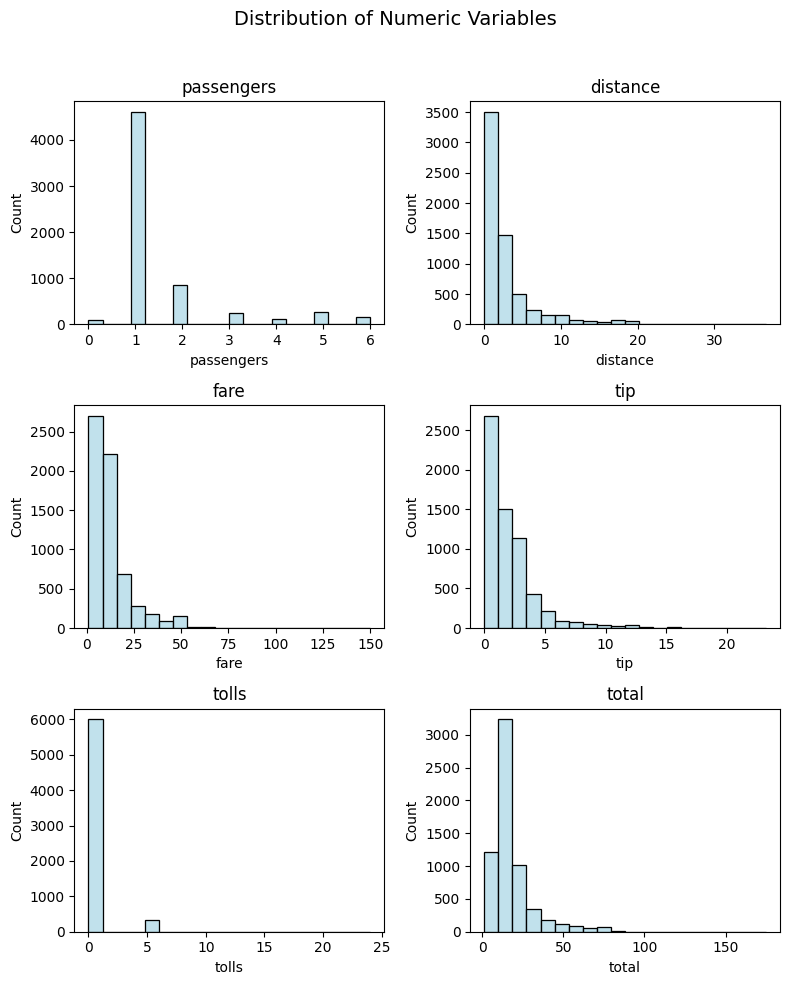

In [31]:
plot_numeric(taxi, numeric_features, 'hist')

Ta-da! With just a simple call, you get a comprehensive visualization showcasing the distribution of your numeric variables.

### Kernel Density Estimates (KDE)

For those who prefer a more nuanced view, the kde plot type is at your service. Watch as your numeric features come to life in a beautifully smooth representation:

(<Figure size 800x1000 with 6 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='passengers', ylabel='Density'>,
        <Axes: title={'center': 'distance'}, xlabel='distance', ylabel='Density'>,
        <Axes: title={'center': 'fare'}, xlabel='fare', ylabel='Density'>,
        <Axes: title={'center': 'tip'}, xlabel='tip', ylabel='Density'>,
        <Axes: title={'center': 'tolls'}, xlabel='tolls', ylabel='Density'>,
        <Axes: title={'center': 'total'}, xlabel='total', ylabel='Density'>],
       dtype=object))

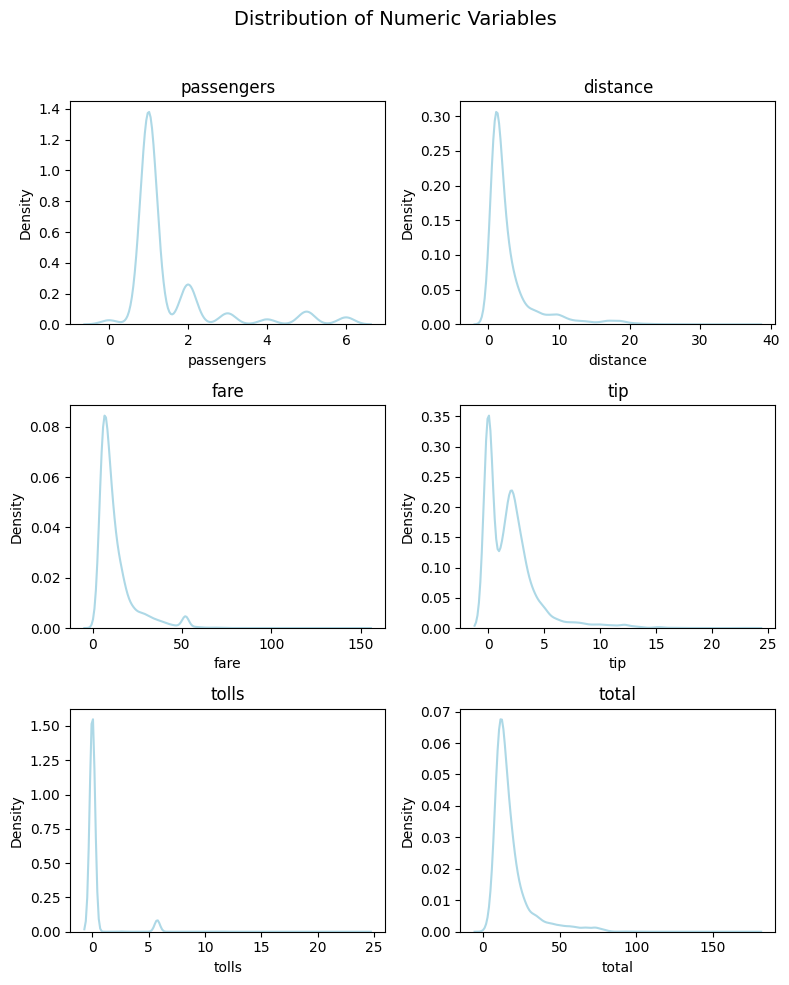

In [32]:
plot_numeric(taxi, numeric_features, 'kde')

Wow! The Kernel Density Estimates provide a clear and elegant perspective on the underlying patterns in your numeric data.

### Histogram + KDE

Now, let's take our exploration a step further. By setting the plot_kind parameter to 'hist+kde', you'll unleash the combined power of histograms and kernel density estimates for a comprehensive understanding:

(<Figure size 800x1000 with 6 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='passengers', ylabel='Count'>,
        <Axes: title={'center': 'distance'}, xlabel='distance', ylabel='Count'>,
        <Axes: title={'center': 'fare'}, xlabel='fare', ylabel='Count'>,
        <Axes: title={'center': 'tip'}, xlabel='tip', ylabel='Count'>,
        <Axes: title={'center': 'tolls'}, xlabel='tolls', ylabel='Count'>,
        <Axes: title={'center': 'total'}, xlabel='total', ylabel='Count'>],
       dtype=object))

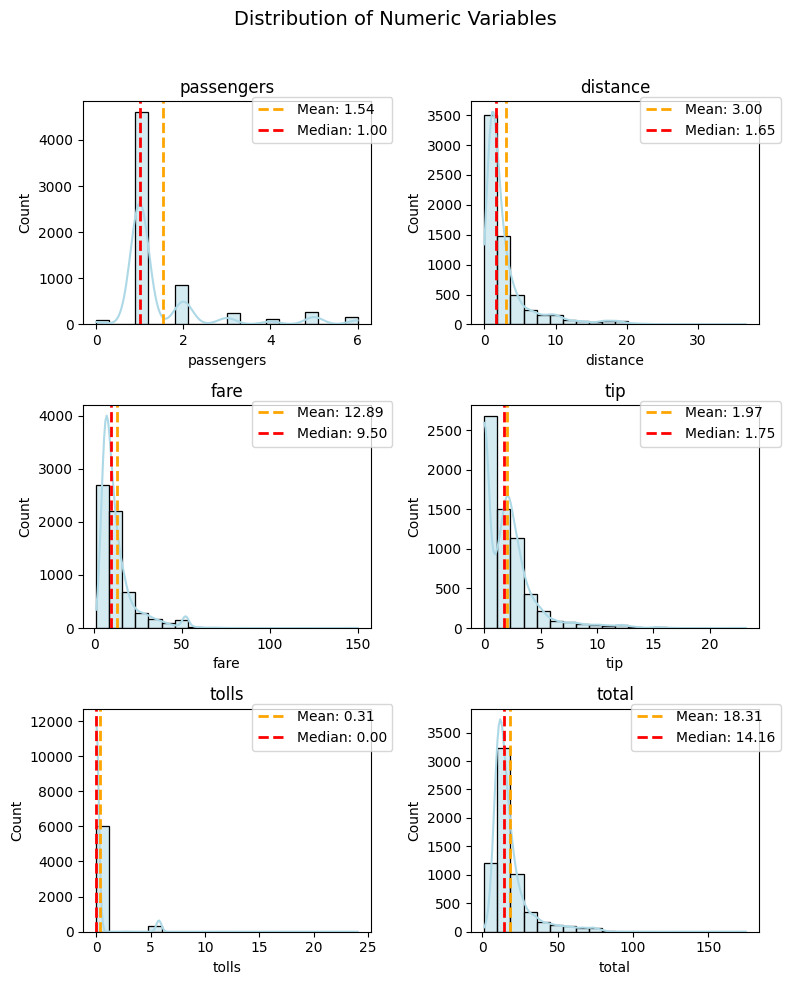

In [33]:
plot_numeric(taxi, numeric_features, 'hist+kde')

Marvel at the detailed insights into your numeric variables, where histograms and KDE seamlessly collaborate to tell a richer data story.


### Optional Parameters

To embark on a more nuanced exploration of your numeric variables and tailor your plots according to specific preferences, delve into the realm of optional parameters. These parameters offer a customizable touch, allowing you to fine-tune your visualizations to align with your unique analytical needs.

#### `figsize`

When venturing into the realm of data visualization, the canvas size plays a crucial role in presenting your insights. The figsize parameter is your tool to shape the dimensions of this canvas. Like with the functions above, the `figsize` parameter configures the width and height of your plot, allowing you to control the spatial arrangement and clarity of visual elements. You can adjust figsize based on your preferences or specific requirements. Larger figures might be suitable for detailed exploration, while smaller ones could be more concise.


(<Figure size 1000x600 with 6 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='passengers', ylabel='Count'>,
        <Axes: title={'center': 'distance'}, xlabel='distance', ylabel='Count'>,
        <Axes: title={'center': 'fare'}, xlabel='fare', ylabel='Count'>,
        <Axes: title={'center': 'tip'}, xlabel='tip', ylabel='Count'>,
        <Axes: title={'center': 'tolls'}, xlabel='tolls', ylabel='Count'>,
        <Axes: title={'center': 'total'}, xlabel='total', ylabel='Count'>],
       dtype=object))

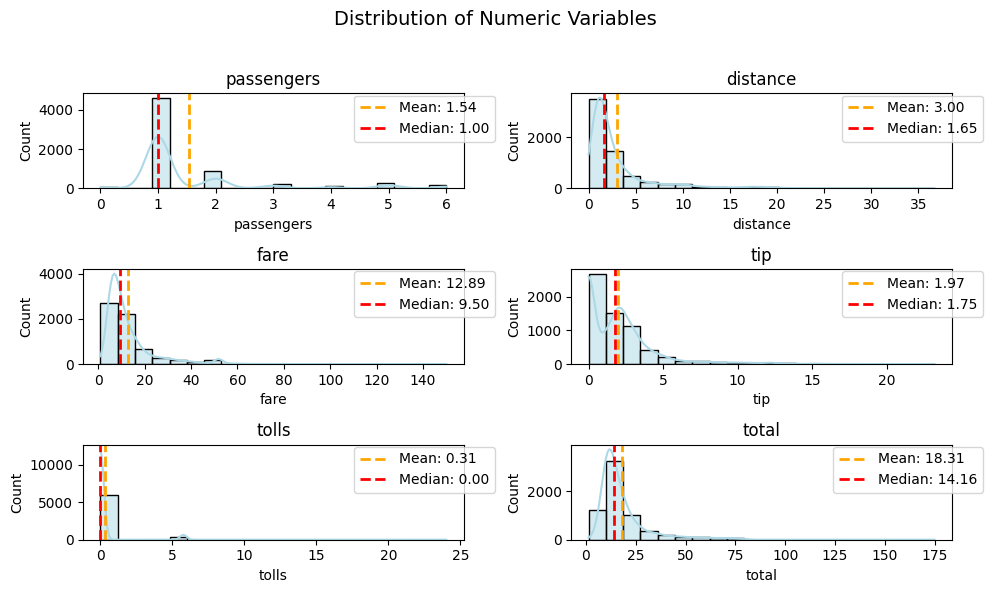

In [34]:
plot_numeric(taxi, numeric_features, 'hist+kde', figsize = (10, 6))

In this trial, a wider but slightly shorter canvas is employed comparing to default(which is (8, 10)), aiming to strike a balance between width and height. Tailoring figsize empowers you to fine-tune your visual narratives. Experiment and discover the canvas dimensions that best complement your data exploration goals.

#### `output`
In the realm of data visualization, sharing your discoveries can be just as important as making them. The `output` parameter in the `plot_numeric` function allows you to effortlessly save your visualizations to the current working directory.


Imagine you've uncovered intriguing insights through your numeric variable exploration using the plot_numeric function. Now, you want to capture and share these visualizations.
By default, the `output` parameter is set to `False`. In this case, your captivating visualizations won't be saved automatically.

(<Figure size 800x1000 with 6 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='passengers', ylabel='Count'>,
        <Axes: title={'center': 'distance'}, xlabel='distance', ylabel='Count'>,
        <Axes: title={'center': 'fare'}, xlabel='fare', ylabel='Count'>,
        <Axes: title={'center': 'tip'}, xlabel='tip', ylabel='Count'>,
        <Axes: title={'center': 'tolls'}, xlabel='tolls', ylabel='Count'>,
        <Axes: title={'center': 'total'}, xlabel='total', ylabel='Count'>],
       dtype=object))

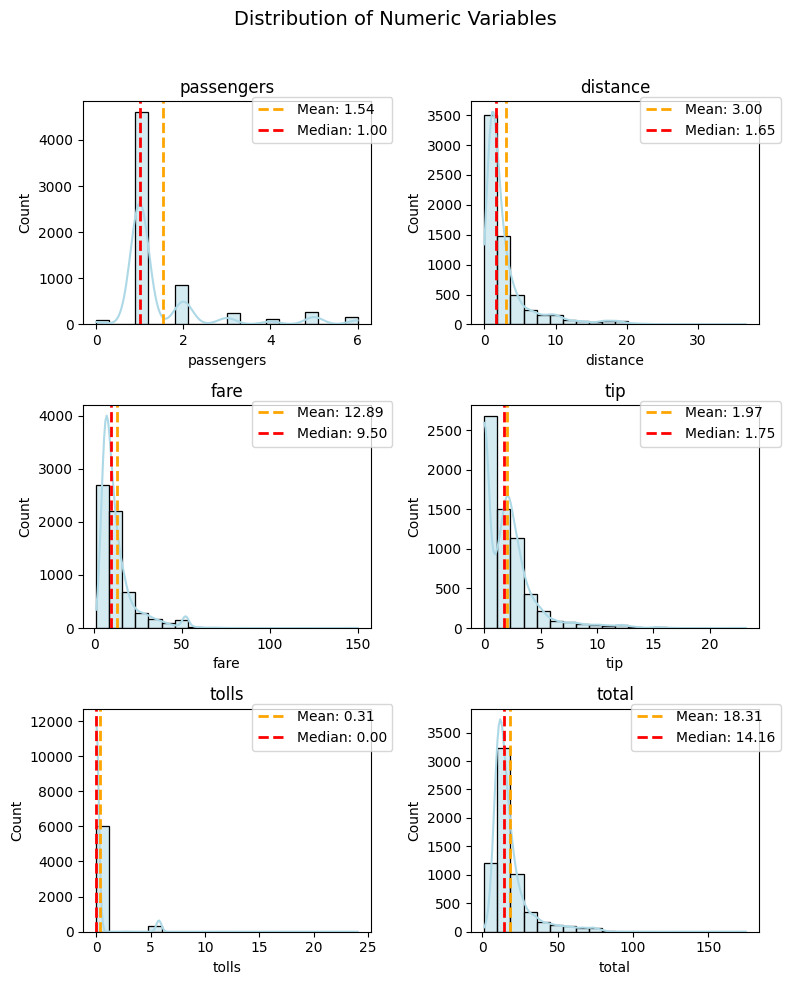

In [35]:
plot_numeric(taxi, numeric_features, 'hist+kde', output=True)


Setting `output` to `True` triggers the magic. Your visual masterpiece will be saved in the current working directory, allowing you to effortlessly share your findings.

If you run the code above, you should notice that a new `numeric_variables.png` file has been saved to your current working directory. Let's remove this figure to clean up the process.

In [36]:
os.remove("numeric_variables.png")

Experiment with this parameter to seamlessly integrate visualization sharing into your data exploration workflow. Whether it's for documentation, reports, or sharing insights with colleagues, the output parameter provides the flexibility you need.

#### `super_title`
In the journey of data exploration, sometimes a single overarching narrative can tie together the story told by multiple visualizations. The `super_title` parameter in the plot_numeric function allows you to infuse your entire plot with a captivating super title.

As you embark on visualizing the distribution of numeric variables in your dataset, imagine you want to give your entire exploration a unified identity. By default, the `super_title` is set to "Distribution of Numeric Variables." This provides a generic but informative label for your exploration.



(<Figure size 800x1000 with 6 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='passengers', ylabel='Count'>,
        <Axes: title={'center': 'distance'}, xlabel='distance', ylabel='Count'>,
        <Axes: title={'center': 'fare'}, xlabel='fare', ylabel='Count'>,
        <Axes: title={'center': 'tip'}, xlabel='tip', ylabel='Count'>,
        <Axes: title={'center': 'tolls'}, xlabel='tolls', ylabel='Count'>,
        <Axes: title={'center': 'total'}, xlabel='total', ylabel='Count'>],
       dtype=object))

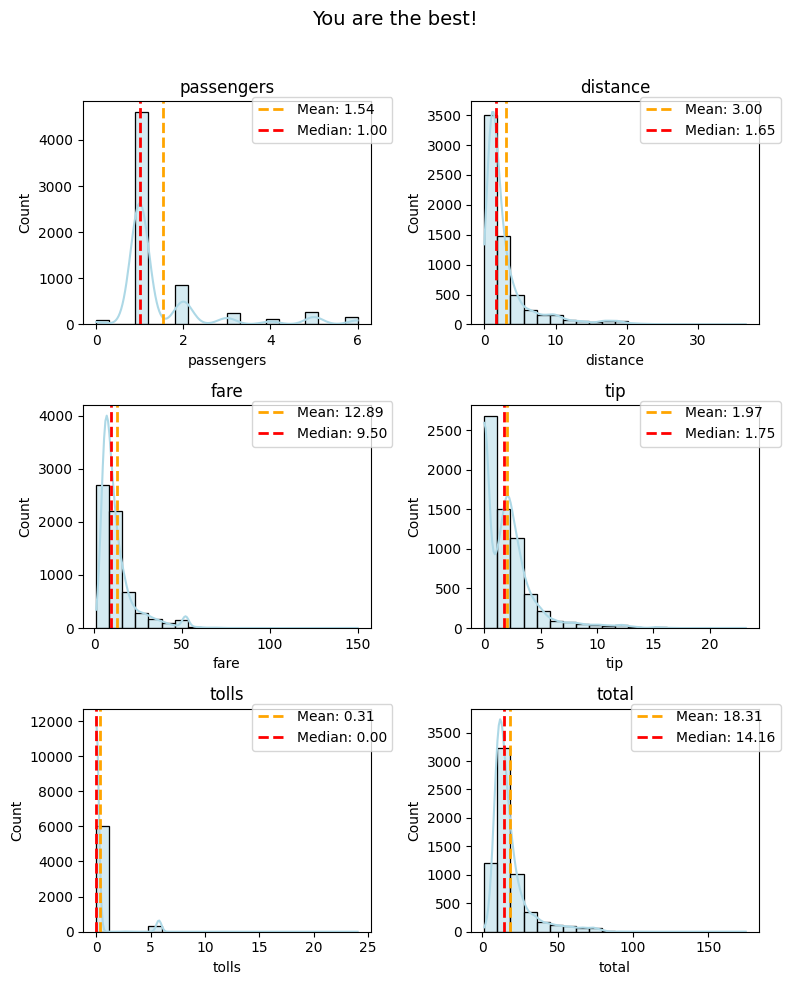

In [37]:
plot_numeric(taxi, numeric_features, 'hist+kde', super_title="You are the best!")


Injecting your creativity, you can set a custom `super_title` to give your entire plot a unique identity. In this example, "You are the best!" adds a touch of personalization to your exploration.



Experiment with different super titles to convey the essence of your data story. Whether it's a summary of findings, a specific theme, or a question you're exploring, the `super_title` parameter lets you add a meaningful layer to your visual narrative.

#### `super_title_font` 
In the realm of data visualization, details matter, and the `super_title_font` parameter in the `plot_numeric` function allows you to precisely control the font size of your super title.

As you craft your visual exploration, imagine tailoring the font size of the super title to match the style and emphasis you desire.By default, the super_title_font is set to 14. This provides a balanced and readable font size for the super title.

(<Figure size 800x1000 with 6 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='passengers', ylabel='Count'>,
        <Axes: title={'center': 'distance'}, xlabel='distance', ylabel='Count'>,
        <Axes: title={'center': 'fare'}, xlabel='fare', ylabel='Count'>,
        <Axes: title={'center': 'tip'}, xlabel='tip', ylabel='Count'>,
        <Axes: title={'center': 'tolls'}, xlabel='tolls', ylabel='Count'>,
        <Axes: title={'center': 'total'}, xlabel='total', ylabel='Count'>],
       dtype=object))

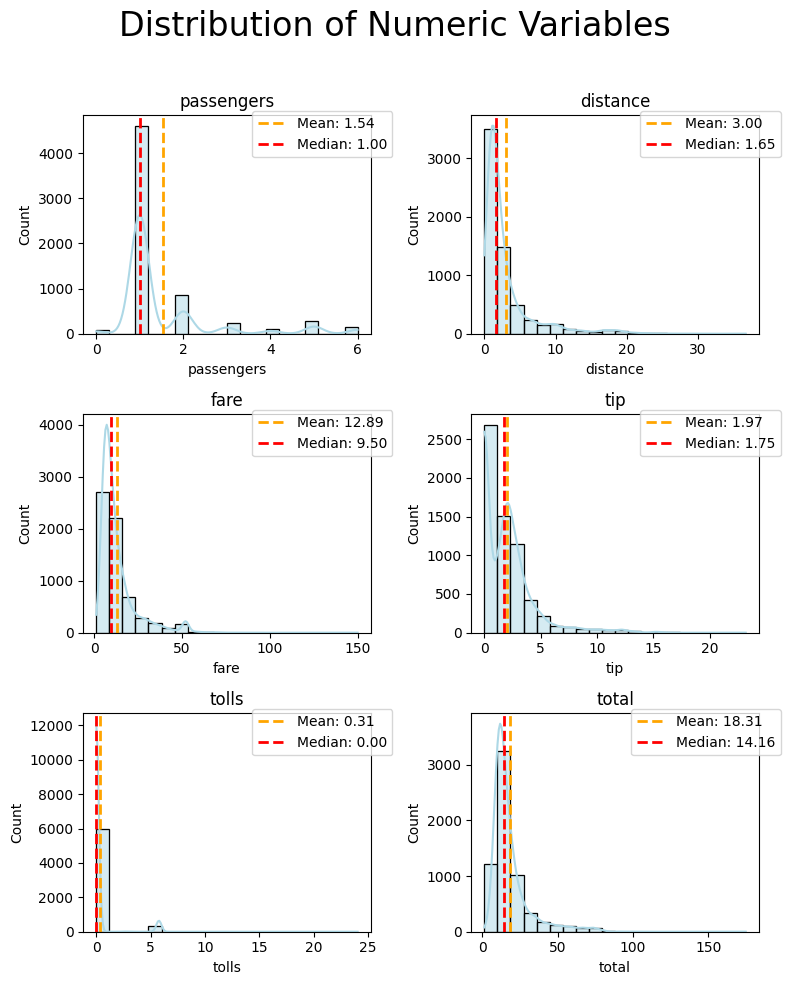

In [38]:
plot_numeric(taxi, numeric_features, 'hist+kde', super_title_font=24)


If you wish to make a bolder statement or increase readability, you can customize the `super_title_font`. In this example, setting it to 24 enhances the prominence of your super title.

Experiment with different font sizes to find the right balance between subtlety and emphasis. The `super_title_font` parameter empowers you to fine-tune the visual aesthetics of your entire plot by adjusting the font size of the overarching title.

#### `color` 
The `color`` parameter is your wand for painting the main elements of your plot. It sets the tone for the entire visualization, creating a captivating backdrop for your numeric narrative. Choose a color that resonates with the essence of your data, whether it be the soothing blue of the sky or the warmth of a golden sunrise.

(<Figure size 800x1000 with 6 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='passengers', ylabel='Count'>,
        <Axes: title={'center': 'distance'}, xlabel='distance', ylabel='Count'>,
        <Axes: title={'center': 'fare'}, xlabel='fare', ylabel='Count'>,
        <Axes: title={'center': 'tip'}, xlabel='tip', ylabel='Count'>,
        <Axes: title={'center': 'tolls'}, xlabel='tolls', ylabel='Count'>,
        <Axes: title={'center': 'total'}, xlabel='total', ylabel='Count'>],
       dtype=object))

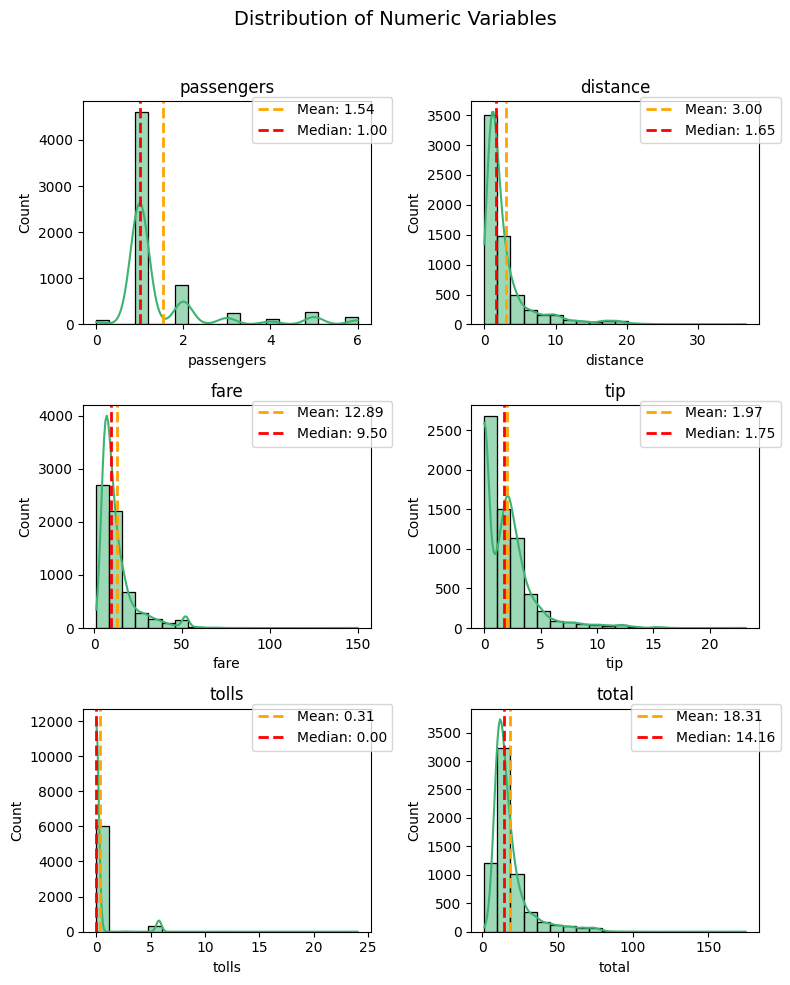

In [38]:
plot_numeric(taxi, numeric_features, 'hist+kde', color='mediumseagreen')

(<Figure size 800x1000 with 6 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='passengers', ylabel='Count'>,
        <Axes: title={'center': 'distance'}, xlabel='distance', ylabel='Count'>,
        <Axes: title={'center': 'fare'}, xlabel='fare', ylabel='Count'>,
        <Axes: title={'center': 'tip'}, xlabel='tip', ylabel='Count'>,
        <Axes: title={'center': 'tolls'}, xlabel='tolls', ylabel='Count'>,
        <Axes: title={'center': 'total'}, xlabel='total', ylabel='Count'>],
       dtype=object))

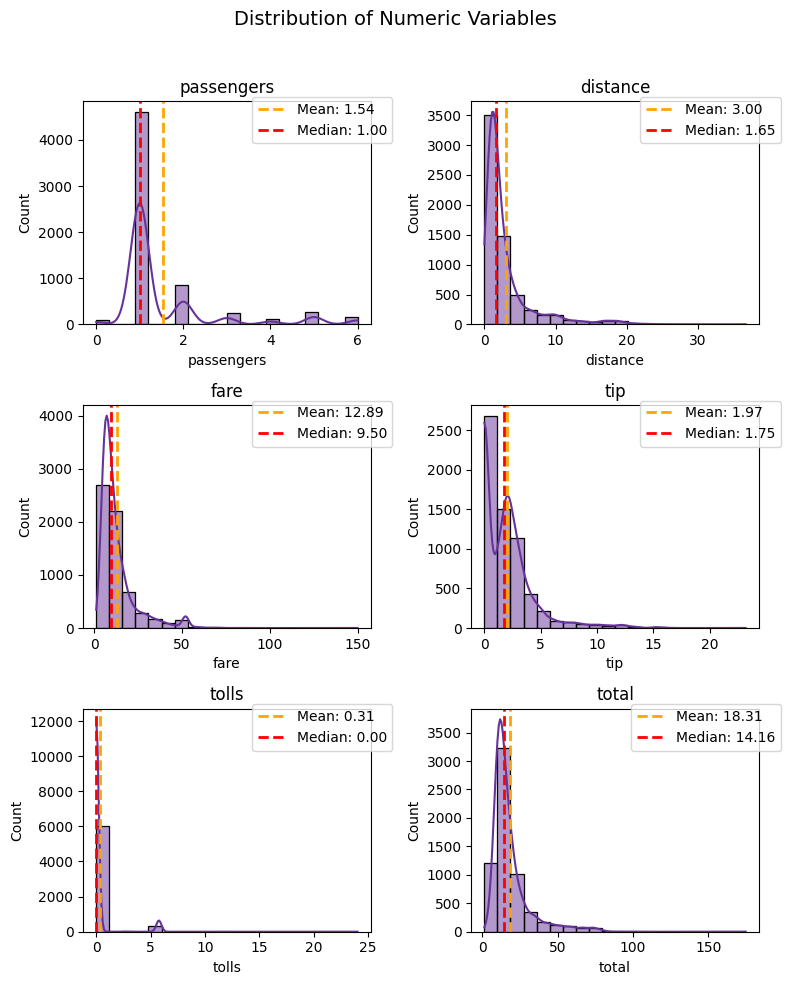

In [39]:
plot_numeric(taxi, numeric_features, 'hist+kde', color='rebeccapurple')

#### `mean_color` 
Highlight the mean line with captivating colors that draw attention to the central tendency:

(<Figure size 800x1000 with 6 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='passengers', ylabel='Count'>,
        <Axes: title={'center': 'distance'}, xlabel='distance', ylabel='Count'>,
        <Axes: title={'center': 'fare'}, xlabel='fare', ylabel='Count'>,
        <Axes: title={'center': 'tip'}, xlabel='tip', ylabel='Count'>,
        <Axes: title={'center': 'tolls'}, xlabel='tolls', ylabel='Count'>,
        <Axes: title={'center': 'total'}, xlabel='total', ylabel='Count'>],
       dtype=object))

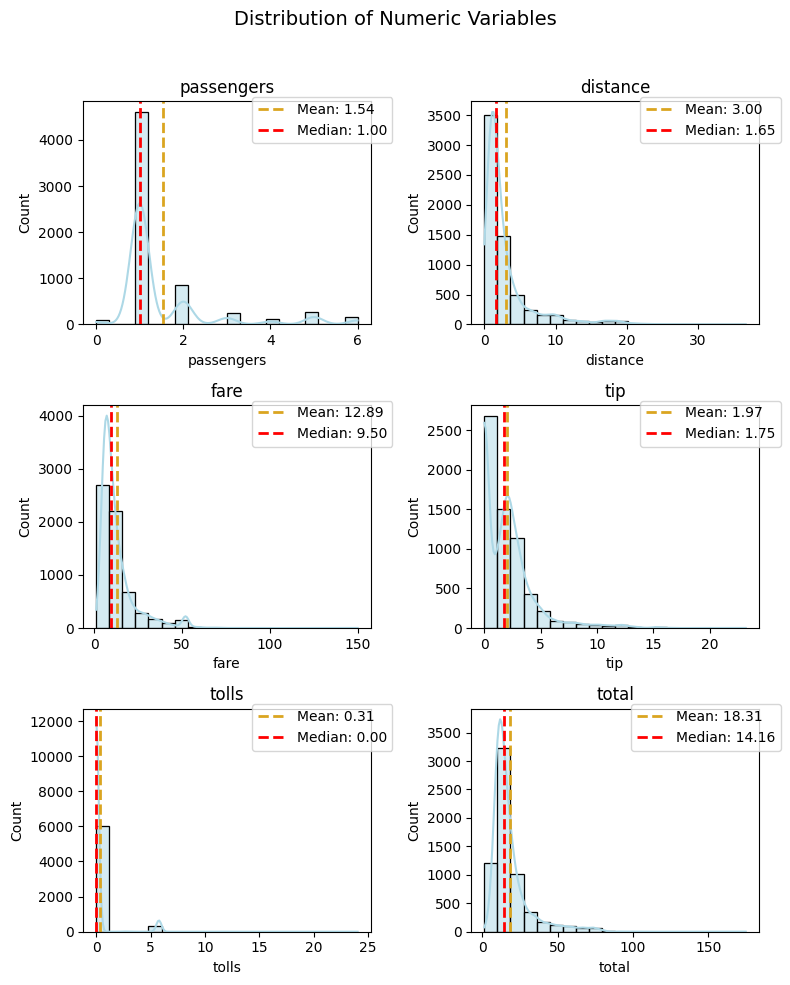

In [40]:
plot_numeric(taxi, numeric_features, 'hist+kde', mean_color='goldenrod')

#### `median_color` 
Let the median line dance with flair by selecting colors that complement or contrast with the main plot:

(<Figure size 800x1000 with 6 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='passengers', ylabel='Count'>,
        <Axes: title={'center': 'distance'}, xlabel='distance', ylabel='Count'>,
        <Axes: title={'center': 'fare'}, xlabel='fare', ylabel='Count'>,
        <Axes: title={'center': 'tip'}, xlabel='tip', ylabel='Count'>,
        <Axes: title={'center': 'tolls'}, xlabel='tolls', ylabel='Count'>,
        <Axes: title={'center': 'total'}, xlabel='total', ylabel='Count'>],
       dtype=object))

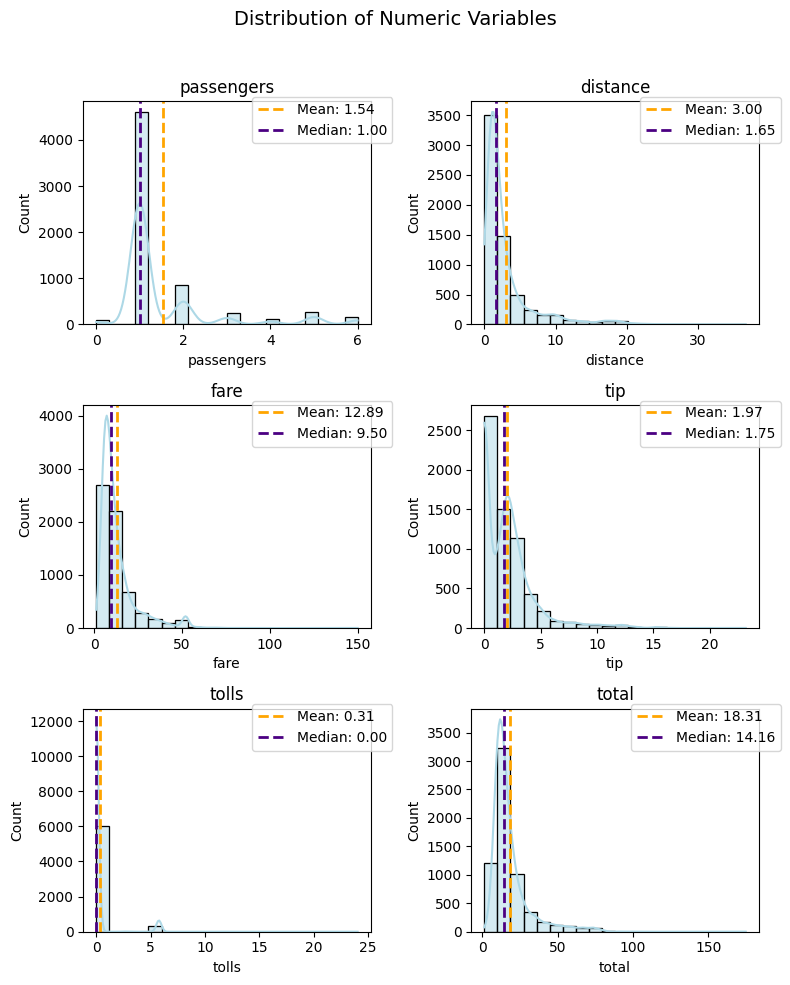

In [41]:
plot_numeric(taxi, numeric_features, 'hist+kde', median_color='indigo')


Feel free to mix and match these colors, creating a visual masterpiece that resonates with the essence of your numeric data. Whether it's the calming green of a meadow or the regal purple of twilight, let the colors in your plot speak volumes about the stories hidden within your numeric variables.

May your numeric exploration be as vibrant as the colors you choose!

Congratulations! You've successfully embarked on a journey of numeric exploration using the `plot_numeric` function. Whether you're unraveling distributions with histograms, delving into subtleties with KDE, or combining both for a holistic view, this function is your reliable companion.

## Exploring Time-series Features

In this final section, we'll explore the use of the `plot_time_series` function from the `PyXplor` package.
This function is particularly useful for visualizing time-series data, providing insights into trends, seasonality,
and patterns over time. We'll continue to use the Seaborn 'taxis' dataset as an example to demonstrate the capabilities of this function.

From the dataset info, we can see that `pickup` and `dropoff` are datetime fields, making them ideal for time-series analysis.
We'll also explore numeric fields like `fare`, focusing on analyzing how the fare amount varies over time.

First let's ensure `pickup` is a datetime type (even though we already know it is):

In [39]:
taxi['pickup'] = pd.to_datetime(taxi['pickup'])

### Line Plots

Let's start with a simple example - feeding in our `taxi` dataframe, our time series column `pickup`, our "list" of numeric features to plot against time (in this case just `fare`), with a monthly frequency (`M`) - to plot fare over time on a monthly basis:

Basic Time Series Plot of Taxi Fares Over Time (Monthly):


(<Figure size 1000x600 with 1 Axes>,
 array([[<Axes: title={'center': 'fare'}, xlabel='Date', ylabel='Values'>]],
       dtype=object))

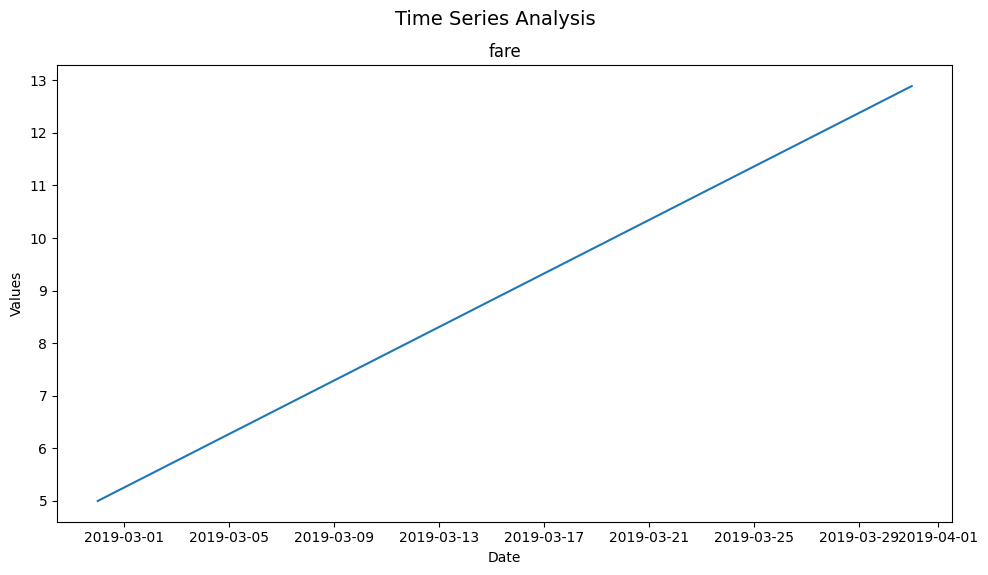

In [40]:
print("Basic Time Series Plot of Taxi Fares Over Time (Monthly):")
plot_time_series(taxi, 'pickup', ['fare'], freq='M')

Given multiple numerical variables, `plot_time_series`, just like the other functions in the `pyxplor` package, can be used to visualize multiple time series with a single call of a function.
Here we can compare `fare` and `distance` over time.

(<Figure size 1000x600 with 2 Axes>,
 array([[<Axes: title={'center': 'fare'}, xlabel='Date', ylabel='Values'>],
        [<Axes: title={'center': 'distance'}, xlabel='Date', ylabel='Values'>]],
       dtype=object))

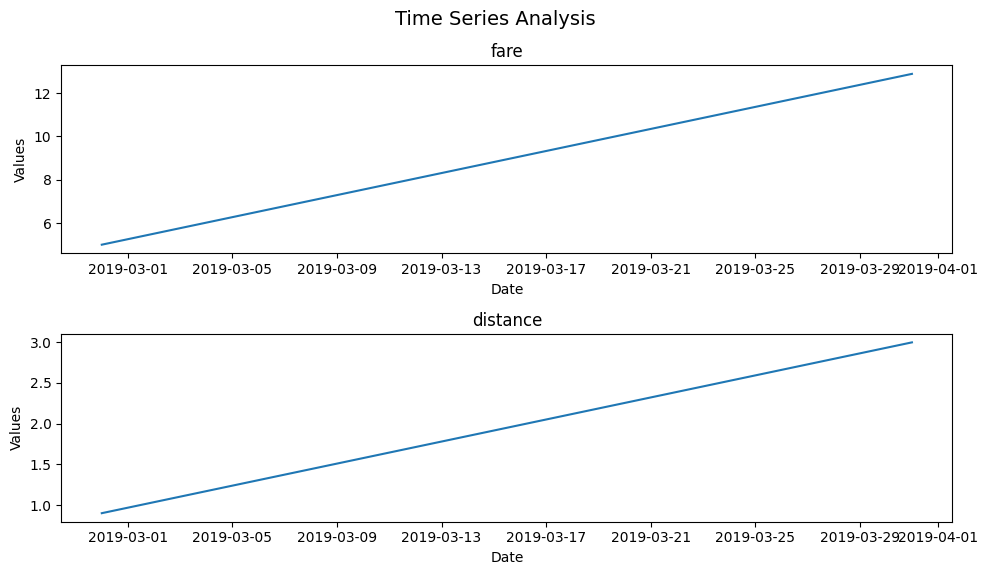

In [41]:
plot_time_series(taxi, 'pickup', ['fare', 'distance'], freq='M')

That's all it takes to make `plot_time_series` work seamlessly! Now, let's explore the optional arguments that add versatility to this function.

### Optional Arguments

#### `freq`

Changing the frequency parameter (`freq`) can offer different insights. We can configure this frequency to be daily ('D'), weekly ('W'), monthly ('M') or yearly ('Y'). Below, we plot the data on a weekly basis.

(<Figure size 1000x600 with 1 Axes>,
 array([[<Axes: title={'center': 'fare'}, xlabel='Date', ylabel='Values'>]],
       dtype=object))

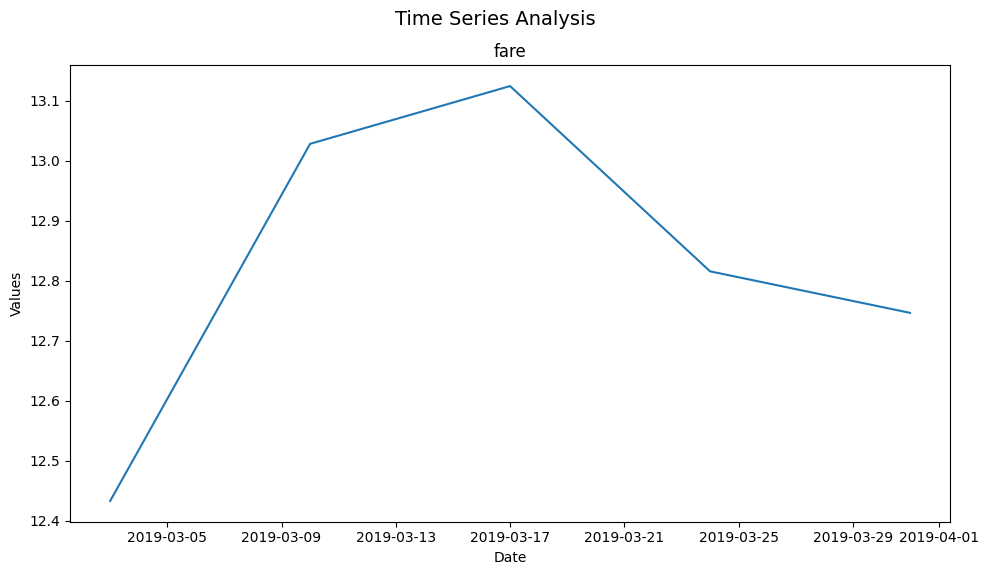

In [42]:
plot_time_series(taxi, 'pickup', ['fare'], freq='W')

#### `figsize`

As with the other functioins in this package, `figsize` allows us to adjust the size of the figure. Here's the same plot with a larger figure size to improve readability.

(<Figure size 1200x600 with 1 Axes>,
 array([[<Axes: title={'center': 'fare'}, xlabel='Date', ylabel='Values'>]],
       dtype=object))

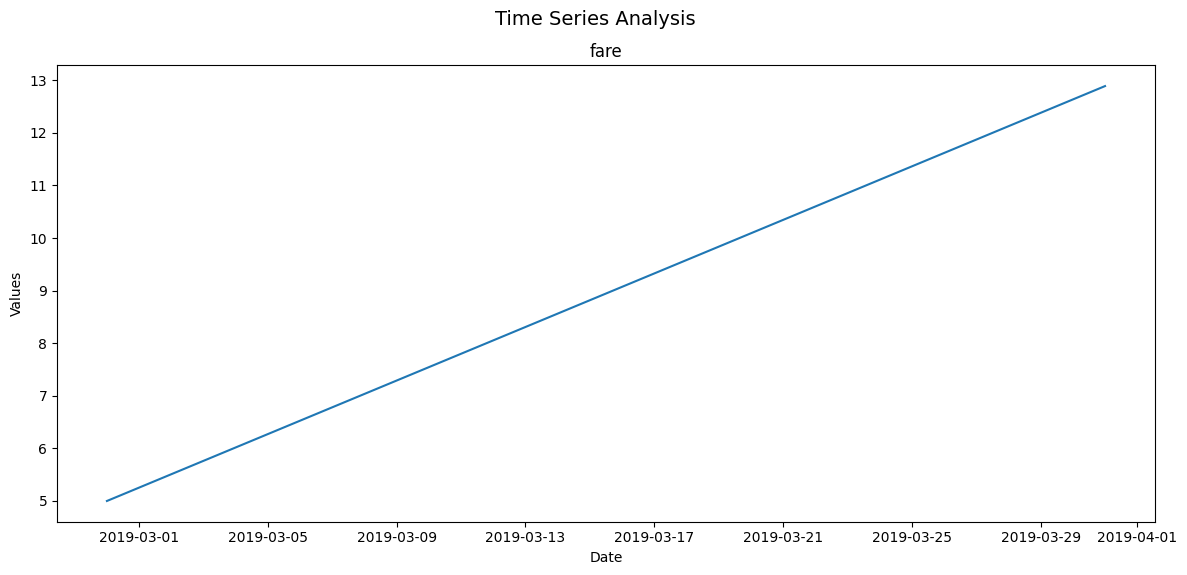

In [43]:
plot_time_series(taxi, 'pickup', ['fare'], freq='M', figsize=(12, 6))

#### `super_title` and `super_title_font`

Customizing the super title and its font size can help contextualize the plot. Here's an example with a custom title.

(<Figure size 1000x600 with 1 Axes>,
 array([[<Axes: title={'center': 'fare'}, xlabel='Date', ylabel='Values'>]],
       dtype=object))

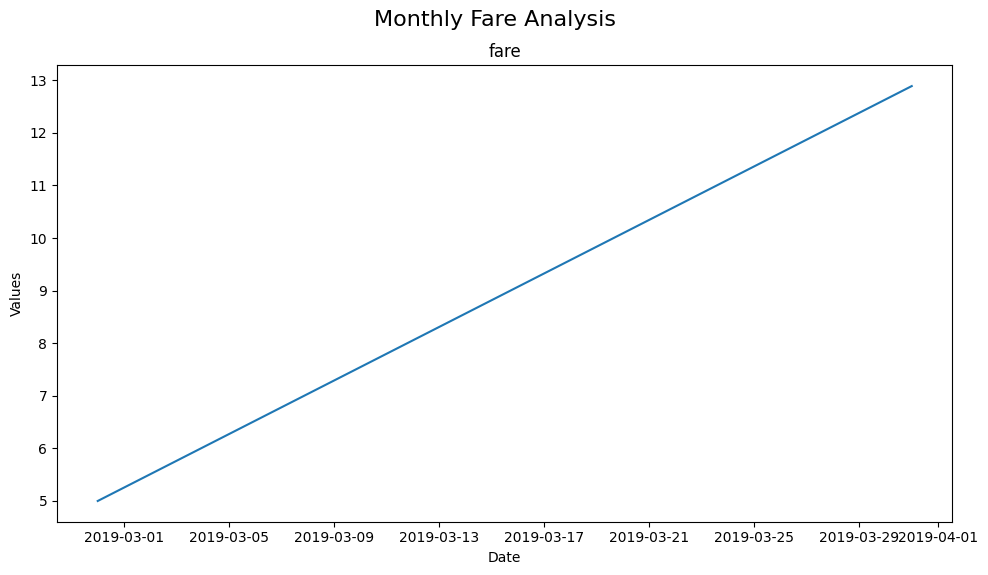

In [44]:
plot_time_series(taxi, 'pickup', ['fare'], freq='M', super_title='Monthly Fare Analysis', super_title_font=16)

#### `output`

The `output` parameter allows saving the plot. Setting it to `True` will save the plot in the current directory.

(<Figure size 1000x600 with 1 Axes>,
 array([[<Axes: title={'center': 'fare'}, xlabel='Date', ylabel='Values'>]],
       dtype=object))

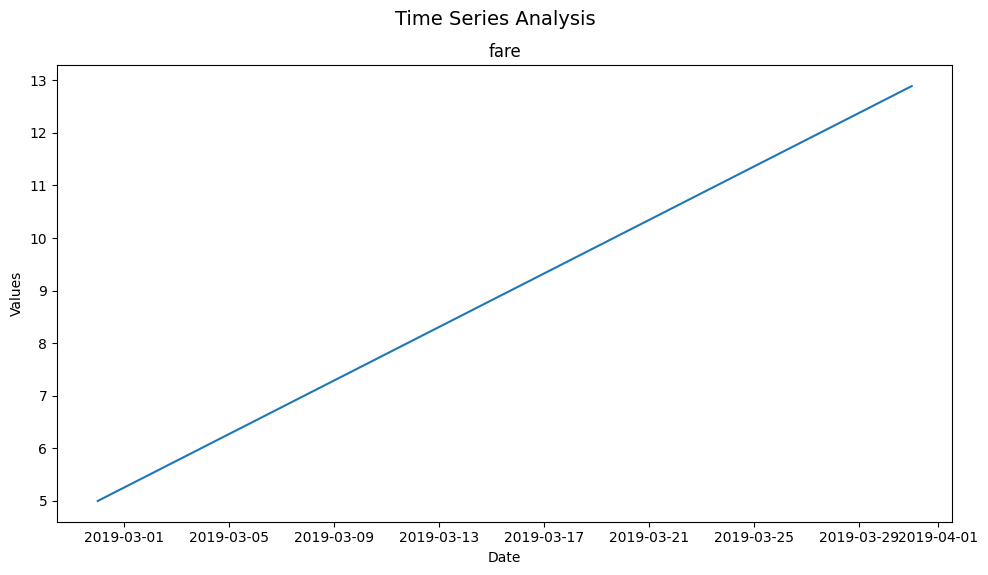

In [45]:
plot_time_series(taxi, 'pickup', ['fare'], freq='M', output=True)

We will, for the final time, remove the output image to clean up our folder.

In [46]:
os.remove("timeseries_variables.png")

In summary, the `plot_time_series` function from PyXplor offers a powerful yet easy-to-use tool for time-series analysis.
Its customization options allow for tailored visualizations suitable for a wide range of data exploration needs.

## Conclusion

That completes the walk-through of the (current) plotting functions in the `PyXplor` package. We hope you see how using these specializied plotting functions can reduce the complexity and time invested in initial data analysis. We will continue to work on this package, introducing more flexibility in terms of configuring the appeareance of the plot - but let us know what you think! 

Have fun and happy exploring!